# FRED Examples

Some examples of how to download and use data from FRED using Pandas.

In [1]:
# Import the pandas library as pd
import pandas as pd

# Import the plotting library matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

## Example: M2 Money Stock

The monetary aggregate M2 has FRED series ID `M2SL` and is available here: https://fred.stlouisfed.org/series/M2SL. To find the data in plaintext, under "Observation:", click "(+more)" and then in the drop-down menu, click "View All". You will be taken to a page that has the data. The URL is for the data is: https://fred.stlouisfed.org/data/M2SL.

Notice that the data URL has the form: `https://fred.stlouisfed.org/data/SERIESID`, where `SERIESID` in this case is `M2SL`.

The page with the data has two HTML tables. The pandas function `pd.read_html()` is ideal for reading the data

In [2]:
# Use pd.read_html() to collect data from all HTML tables
tables = pd.read_html('https://fred.stlouisfed.org/data/M2SL',index_col=0)

# Find the number of elements in `tables`
print('There are',len(tables),'elements in `tables`.\n')

# Print the types of the elements in `tables`
print('The types of the objects in tables are:\n')
for elem in tables:
    print('\t',type(elem))

There are 2 elements in `tables`.

The types of the objects in tables are:

	 <class 'pandas.core.frame.DataFrame'>
	 <class 'pandas.core.frame.DataFrame'>


The previous cell produces a variable called `tables` that is a two element list. Each element contains the content of one of the HTML tables. The first is the metadata about the M2 data and the seecond element is the actual data.

First, let's look at the data. Create a variable called `m2` that contains the M2 data.

In [3]:
# Create variable `m2` equal to 'VALUE' column of the second table in `tables`
m2 = tables[1]['VALUE']

# Parse the dates in `m2.index` and overwrite
m2.index = pd.DatetimeIndex(m2.index)

# Display the data
m2

DATE
1959-01-01      286.6
1959-02-01      287.7
1959-03-01      289.2
1959-04-01      290.1
1959-05-01      292.2
               ...   
2024-05-01    20959.4
2024-06-01    21020.1
2024-07-01    21039.4
2024-08-01    21141.2
2024-09-01    21221.2
Name: VALUE, Length: 789, dtype: float64

Now, let's look at the metadata.

In [4]:
# Create a variable called `metadata` equal to the first table
metadata = tables[0][1]

# Remove the index name because '0' is meaningless
metadata.index.name = None

metadata

Title                                                                 M2
Series ID                                                           M2SL
Source                 Board of Governors of the Federal Reserve Syst...
Release                                         H.6 Money Stock Measures
Seasonal Adjustment                                  Seasonally Adjusted
Frequency                                                        Monthly
Units                                                Billions of Dollars
Date Range                                      1959-01-01 to 2024-09-01
Last Updated                                     2024-10-22 12:01 PM CDT
Notes                  Before May 2020, M2 consists of M1 plus (1) sa...
Name: 1, dtype: object

Now, you can access elements in the metadata in useful ways. For example, the title of the data:

In [5]:
metadata['Title']

'M2'

Or the units of the data:

In [6]:
metadata['Units']

'Billions of Dollars'

Or take the value for 'Date Range', split the string on ` to ` (with a single space on each side), and use `pd.to_datetime()` to parse the date strings in the resulting list.

In [7]:
date_range = pd.to_datetime(metadata['Date Range'].split(' to '))

date_range

DatetimeIndex(['1959-01-01', '2024-09-01'], dtype='datetime64[ns]', freq=None)

Finally, use the metadata to fill in words in sentences about the data. Note that the `\` character can be used in a string to continue a string over multiple lines

In [8]:
sentences = metadata.loc['Title']+' data is supplied by the '+metadata.loc['Source']+' as part of \
the '+metadata['Source']+'. The data are observed at a '+metadata['Frequency']+' frequency from \
'+date_range[0].strftime('%B %-d, %Y')+' to '+date_range[1].strftime('%B %-d, %Y')+'.'

print(sentences)

M2 data is supplied by the Board of Governors of the Federal Reserve System (US) as part of the Board of Governors of the Federal Reserve System (US). The data are observed at a Monthly frequency from January 1, 1959 to September 1, 2024.


## Plot most recent year of M2 data

You can see from FRED that the data are at a monthly observation frequency. So we plot the final 13 elements of `m2`.

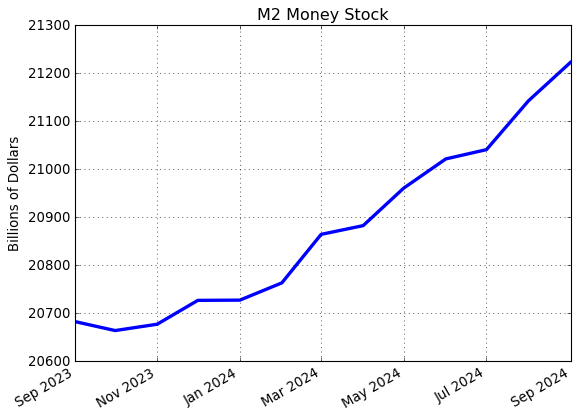

In [9]:
# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot m2 data
ax.plot(m2[-13:],'-',lw=3)

# Add title and y-axis label
ax.set_title('M2 Money Stock')
ax.set_ylabel(metadata['Units'])

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

# Add grid
ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('m2.png',dpi = 120,bbox_inches='tight')

Evidently the money supply in the US has expanded considerably in the past year.

## Plot most recent year of M2 growth

Recall that the growth rate of a quantity $X_t$ is:
\begin{align}
\text{growth rate of }X_t & = \frac{X_t - X_{t-1}}{X_{t-1}}
\end{align}

You can use the `.shift()` method for Pandas objects to create the lagged ($t-1$) value of $X$.

In [10]:
# Create legged M2
m2_lag = m2.shift(1)

m2_lag.head()

DATE
1959-01-01      NaN
1959-02-01    286.6
1959-03-01    287.7
1959-04-01    289.2
1959-05-01    290.1
Name: VALUE, dtype: float64

The data have been shifted forward one time increment and so there is a missing value for the first date.

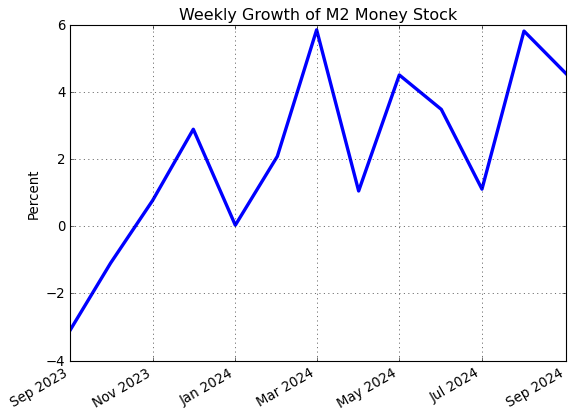

In [11]:
# Create growth rate of m2
m2_growth = m2/m2_lag - 1

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot. Multiply growth by 100 to get units in percent
ax.plot(12*100*m2_growth[-13:],'-',lw=3)

# Add title and y-axis label
ax.set_title('Weekly Growth of M2 Money Stock')
ax.set_ylabel('Percent')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

# Add grid
ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('m2_growth.png',dpi = 120,bbox_inches='tight')

Maybe you'd like a bar chart instead?

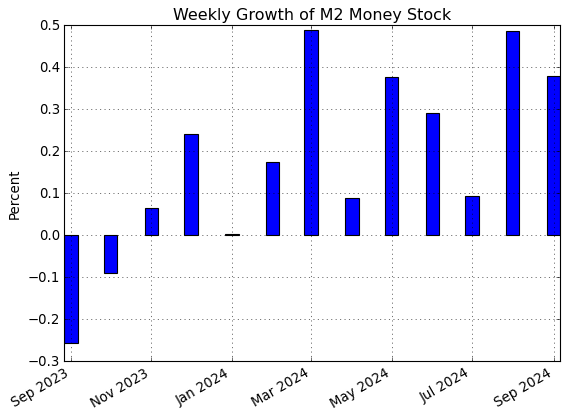

In [12]:
# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot. Multiply growth by 100 to get units in percent.
ax.bar(m2_growth[-13:].index,100*m2_growth[-13:],width=10)
fig.autofmt_xdate()

# Add title and y-axis label
ax.set_title('Weekly Growth of M2 Money Stock')
ax.set_ylabel('Percent')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('m2_growth_bar.png',dpi = 120,bbox_inches='tight')

## Compute growth rate of M2 over previous year

In [13]:
m2_growth_one_year = 100*(m2.iloc[-1] / m2.iloc[-13]- 1)

print('M2 growth over previous year: '+str(round(m2_growth_one_year,2))+'%')

M2 growth over previous year: 2.61%


# Example: Consumer Price Index

The consumer price index is a measure of the price level. "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average" has FRED series ID `CPIAUCSL` and is available here: https://fred.stlouisfed.org/series/CPIAUCSL.

Notice that here there are now 54 lines of text *before* the line starting with "DATE". That means you now need to tell Pandas to skip the first 54 rows of the text when importing.

In [14]:
# Use pd.read_html() to collect data from all HTML tables
tables = pd.read_html('https://fred.stlouisfed.org/data/CPIAUCSL',index_col=0)

# Create variable `cpi` equal to 'VALUE' column of the second table in `tables`
cpi = tables[1]['VALUE']

# Parse the dates in `cpi.index` and overwrite
cpi.index = pd.DatetimeIndex(cpi.index)

# Display the data
cpi

DATE
1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2024-05-01    313.225
2024-06-01    313.049
2024-07-01    313.534
2024-08-01    314.121
2024-09-01    314.686
Name: VALUE, Length: 933, dtype: float64

In [15]:
# Create a variable called `metadata` equal to the first table
metadata = tables[0][1]

# Remove the index name because '0' is meaningless
metadata.index.name = None

metadata

Title                  Consumer Price Index for All Urban Consumers: ...
Series ID                                                       CPIAUCSL
Source                                   U.S. Bureau of Labor Statistics
Release                                             Consumer Price Index
Seasonal Adjustment                                  Seasonally Adjusted
Frequency                                                        Monthly
Units                                                Index 1982-1984=100
Date Range                                      1947-01-01 to 2024-09-01
Last Updated                                      2024-10-10 7:42 AM CDT
Notes                  The Consumer Price Index for All Urban Consume...
Name: 1, dtype: object

## Plot most recent 2 years of CPI data

You can see from FRED that the data are at a monthly observation frequency. So we plot the final 24 elements of `cpi`.

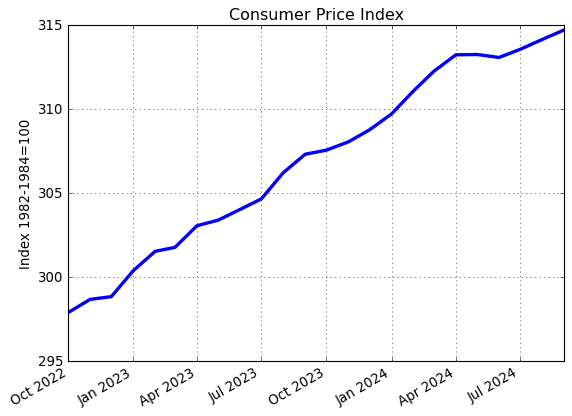

In [16]:
# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(cpi[-24:],'-',lw=3)

# Add title and y-axis label
ax.set_title('Consumer Price Index')
ax.set_ylabel(metadata.loc['Units'])

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

# Add grid
ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('cpi.png',dpi = 120,bbox_inches='tight')

Look at the big drop in consumer prices in February, March, and April that was followed by fairly rapid recovery.

## Monthly CPI inflation over previous 2 years

We can obtain a measure of inflation as the growth rate of the CPI.

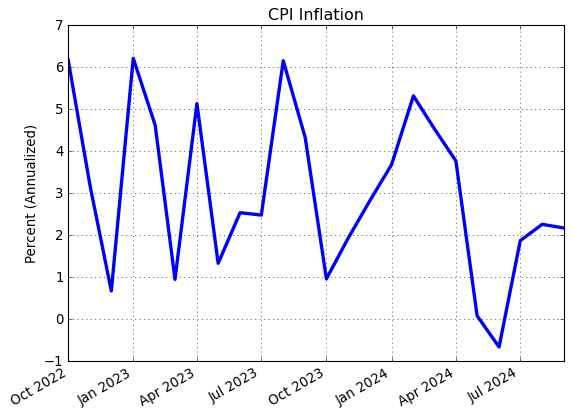

In [17]:
# Compute CPI inflation
cpi_inflation = cpi/cpi.shift(1)-1

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(100*12*cpi_inflation[-24:],'-',lw=3)

# Add title and y-axis label
ax.set_title('CPI Inflation')
ax.set_ylabel('Percent (Annualized)')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

# Add grid
ax.grid()

# Save the figure as a png file. bbox_inches = 'tight' reduces whitespace around the figure
fig.savefig('cpi_inflation.png',dpi = 120,bbox_inches='tight')

Notice that the data are multiplied by 100 and 12 so that the units are annualized percent change. It is a convention to annualize inflation and interest data to standardize the units.

## Average CPI inflation over different subsamples

Suppose you want to compare the average rate of CPI inflation over the past year with that over the past 2 years, 5 years, and 50 years. Then use the formula:

\begin{align}
\text{CPI}_T & = (1 + \pi)^T \text{CPI}_0
\end{align}

to compute 

\begin{align}
\pi & = \left(\frac{\text{CPI}_T}{\text{CPI}_0}\right)^{1/T} - 1
\end{align}

In [18]:
# Compute and print average inflation rates
print('Average CPI inflation\n')
print('  Previous year:     '+str(round(100*(cpi.iloc[-1]/cpi.iloc[-1-1*12]-1),2))+'%')
print('  Previous 2 years:  '+str(round(100*((cpi.iloc[-1]/cpi.iloc[-1-2*12])**(1/2)-1),2))+'%')
print('  Previous 10 years: '+str(round(100*((cpi.iloc[-1]/cpi.iloc[-1-10*12])**(1/10)-1),2))+'%')
print('  Previous 50 years: '+str(round(100*((cpi.iloc[-1]/cpi.iloc[-1-50*12])**(1/50)-1),2))+'%')
print('  All years        : '+str(round(100*((cpi.iloc[-1]/cpi.iloc[0])**(1/(len(cpi)-1)*12)-1),2))+'%')

Average CPI inflation

  Previous year:     2.41%
  Previous 2 years:  3.05%
  Previous 10 years: 2.86%
  Previous 50 years: 3.72%
  All years        : 3.52%


See how much lower the average inflation rate over the last year has been compared to most of the larger subsamples?